# Домашнее задание 2: библиотека Numpy и линейная алгебра


Импортируем библиотеки:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

from scipy import misc 

%matplotlib inline

*Вопросы для самопроверки:*
1. Что такое NumPy?
2. Зачем используется и почему работает быстрее?
3. Что такое линейная алгебра?
4. Как она связана с машинным обучением и глубоким обучением?

### Задание 1

В первой задаче вам предлагается перемножить две квадратные матрицы двумя способами -- без использования пакета numpy и с ним.

In [2]:
# Для генерации матриц используем фукнцию random -- она используется для генерации случайных объектов 
# функция sample создает случайную выборку. В качестве аргумента ей передается кортеж (i,j), здесь i -- число строк,
# j -- число столбцов.
a = np.random.sample((10,10))
b = np.random.sample((10,10))
# выведите размерность (ранг) каждой матрицы с помощью функции ndim.
# Используйте функцию shape, что она вывела?
# ========
display(a.ndim, b.ndim, a.shape, b.shape)
# ========

2

2

(10, 10)

(10, 10)

In [3]:
def mult(a, b):
    c = [[0]*len(b[0]) for _ in range(len(a))]
    for i in range(len(a)):
        for j in range(len(b[0])):
            for k in range(len(b)):
                c[i][j] += a[i][k] * b[k][j]
    return c

In [4]:
def np_mult(a, b):
    return np.dot(a, b)

In [5]:
%%time
# засечем время работы функции без NumPy
mult(a,b)
None

CPU times: user 2.07 ms, sys: 0 ns, total: 2.07 ms
Wall time: 2.09 ms


In [6]:
%%time
# засечем время работы функции с NumPy
np_mult(a,b)
None

CPU times: user 157 µs, sys: 30 µs, total: 187 µs
Wall time: 114 µs


### Задание 2

Напишите функцию, которая по данной последовательности $\{A_i\}_{i=1}^n$ строит последовательность $S_n$, где $S_k = \frac{A_1 + ... + A_k}{k}$.
Аналогично -- с помощью библиотеки NumPy и без нее. Сравните скорость, объясните результат.

In [7]:
# функция, решающая задачу с помощью NumPy
def sec_av(A):
    return np.cumsum(A.copy()) / np.arange(1,len(A)+1)

In [8]:
# функция без NumPy
def stupid_sec_av(A):
    S = [0 for i in range(len(A))]
    S[0] = A[0]
    for i in range(1,len(A)):
        S[i] = S[i-1] + A[i]
    for i in range(1, len(A) + 1):
        S[i-1] /= i
    return S

# зададим некоторую последовательность и проверим ее на ваших функциях. 
# Первая функция должна работать ~ в 50 раз быстрее
A = sps.uniform.rvs(size=10 ** 7) 
b = A.copy()
%time S1 = sec_av(A)
%time S2 = stupid_sec_av(A)
#проверим корректность:
np.abs(S1 - S2).sum()

CPU times: user 75.5 ms, sys: 72 ms, total: 147 ms
Wall time: 148 ms
CPU times: user 5.78 s, sys: 87 ms, total: 5.86 s
Wall time: 5.86 s


0.0

### Задание 3

Пусть задан некоторый массив $X$. Надо построить новый массив, где все элементы с нечетными индексами требуется заменить на число $a$ (если оно не указано, то на 1). Все четные элементы исходного массива нужно возвести в куб и записать в обратном порядке относительно позиций этих элементов. Массив $X$ при этом должен остаться без изменений. В конце требуется слить массив $X$ с преобразованным $X$ и вывести в обратном порядке.

In [9]:
# функция, решающая задачу с помощью NumPy
def transformation(X, a=1.):
    Y = np.array(X)
    Y[1::2] = a
    Y[::2] = np.flip(Y[::2] ** 3, axis=0)
    return np.flip(np.concatenate((Y, X)), axis=0)

In [10]:
# функция, решающая задачу  без NumPy
def stupid_transformation(X, a=1.):
    lenx = len(X)
    Y = [0 for _ in range(lenx)]
    for i in range(1, lenx, 2):
        Y[i] = a
    for i in range(0, lenx, 2):
        Y[i] = X[i] ** 3
    Y[::2] = Y[-2 + (lenx%2)::-2]
    return np.concatenate((Y, X))[::-1]

In [11]:
X = sps.uniform.rvs(size=10 ** 7) 
# здесь код эффективнее примерно в 20 раз. 
# если Вы вдруг соберетесь печатать массив без np -- лучше сначала посмотрите на его размер
%time S1 = transformation(X)
%time S2 = stupid_transformation(X)
# проверим корректность:
np.abs(S1 - S2).sum()

CPU times: user 401 ms, sys: 120 ms, total: 521 ms
Wall time: 521 ms
CPU times: user 3.62 s, sys: 164 ms, total: 3.79 s
Wall time: 3.79 s


0.0

Что вы можете сказать о скорости вычислений в `NumPy`? Ответ обоснуйте.

**Ответ:**

### Задание 4

Вам подаются на вход два вектора `a` и `b` в трехмерном пространстве.Заполните их случайными числами. Реализуйте их скалярное произведение с помощью  `NumPy` и без. Засеките время работы, как это показано в заданиях выше.

In [12]:
a = np.random.randn(3)
b = np.random.randn(3)

In [13]:
def stupid_scalar_product(a,b):
    return sum([x*y for x, y in zip(a,b)])

In [14]:
def numpy_scalar_product(a,b):
    return np.sum(a * b)

In [15]:
%time product_1 = stupid_scalar_product(a, b)
%time product_2 = numpy_scalar_product(a, b)
# проверим корректность:
np.abs(product_1 - product_2).sum()

CPU times: user 33 µs, sys: 2 µs, total: 35 µs
Wall time: 40.8 µs
CPU times: user 68 µs, sys: 5 µs, total: 73 µs
Wall time: 78.2 µs


0.0

## Бонусная часть (в тесте вопросов по ней не будет)

Image = 2-D численный массив
(или 3-D: CT, MRI, 2D + time; 4-D, …)
В текущем задании, image == Numpy array (np.array)

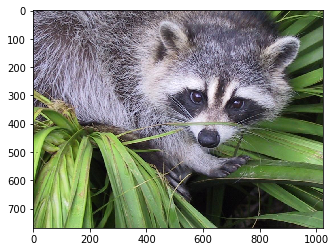

In [16]:
pic = misc.face() #встроенная в библиотеку функция, которая загружает картинку с енотом
plt.imshow(pic)

Выведите тип и размеры для переменной pic. Что лежит внутри?

In [17]:
print(type(pic), pic.shape)

<class 'numpy.ndarray'> (768, 1024, 3)


Если вы все сделали правильно, что для формы у вас выведется кортеж из трех чисел: (X, Y, 3). Предположите, откуда там 3?

**Ответ:** картинка в формате RGB. соответствено 3 цветовых канала. то есть каждый пиксель задаётся тремя числами.

С помощью функции ниже можно вывести изображение и посмотреть, что находится внутри:

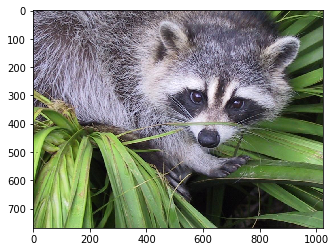

In [18]:
plt.imshow(pic)

Убедитесь, что внутри массива `pic` действительно лежат числа. Выведите первые 10 записей.
Массив состоит из троек чисел, которые характеризуют глубину цвета для каждого пикселя. Из пикселей складывается картинка.

In [19]:
print(pic[:10])

[[[121 112 131]
  [138 129 148]
  [153 144 165]
  ...
  [119 126  74]
  [131 136  82]
  [139 144  90]]

 [[ 89  82 100]
  [110 103 121]
  [130 122 143]
  ...
  [118 125  71]
  [134 141  87]
  [146 153  99]]

 [[ 73  66  84]
  [ 94  87 105]
  [115 108 126]
  ...
  [117 126  71]
  [133 142  87]
  [144 153  98]]

 ...

 [[ 68  68  80]
  [ 70  69  83]
  [ 67  66  80]
  ...
  [117 141  81]
  [120 146  85]
  [123 149  88]]

 [[102 102 114]
  [ 94  94 106]
  [ 85  84  98]
  ...
  [109 137  78]
  [ 98 126  67]
  [ 91 119  60]]

 [[123 123 135]
  [116 116 128]
  [108 108 120]
  ...
  [ 55  84  26]
  [ 47  76  18]
  [ 44  73  15]]]


Выведите значение максимального элемента в матрице. Выведите значение минимального. Выведите среднее по всем элементам матрице. В каких пределах лежат значения глубины цветов?

In [20]:
print(np.max(pic), np.min(pic), np.average(pic))

255 0 110.16274388631184


## Задание 2

Теперь загрузим черно-белое изображение енота, чтобы наш массив был не 3-х мерным тензором, а двумерным массивом. Тензоры обрабатываются точно также, но для простоты пока что давайте работать с двумерными массивами, т.е. матрицами.

In [21]:
pic = misc.face(gray=True)

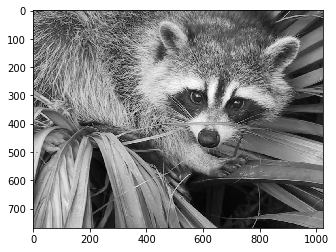

In [22]:
plt.imshow(pic, 'gray')

Выведите форму (shape) полученной картинки `pic`. Какие выводы можно сделать? Положите в `h`,`w` высоту и ширину картинки.

In [23]:
print(pic.shape)
h,w=pic.shape

(768, 1024)


Используя библиотеку `numpy`, отразите изображение по горизонтали. Выведите картинку.

Подсказка: не забывайте, что изображения -- это просто двумерные массивы

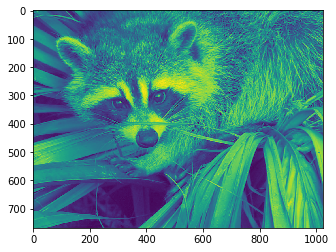

In [24]:
pic = pic[:, ::-1]
plt.imshow(pic)

Теперь давайте повысим контрастность -- для этого к каждому пикселю прибавим 50 единиц

In [25]:
pic += 50

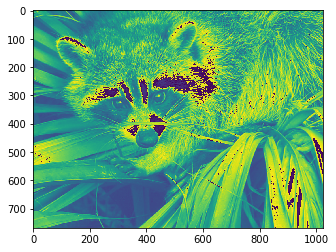

In [26]:
plt.imshow(pic)

Теперь давайте попробуем превратить наше одноканальное изображение в трехканальный (RGB) тензор. Для этого вместо каждого пикселя в одноканальном изображении (в двумерном массиве) поставим кортеж из трех элементов -- глубины красного, зеленого и голубого соотвественно. Восстановить по ч/б картинке цветной мы не можем, так как мы не можем взять утерянную информацию из ниоткуда, но можем усилить черные и белые участки. Для этого давайте заполним все три канала одинаковыми значениями, деленными на что-то очень большое. Например $--$ на $200$.  То есть, например, если в пикселе `pic[i][j]` лежало значение **200**, то для нового изображения `new_pic` мы заполняем `new_pic[i][j]` кортежем из трех чисел `int(pic[i][j]/3)`. Функция `int` $--$ округление до целой части.

In [27]:
new_pic = np.zeros((h,w,3)) #создадим пустую матрицу, куда будем записывать значения
for i in range(h):
    for j in range(w):
     new_pic[i][j] = [int(pic[i][j]/3)] * 3

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


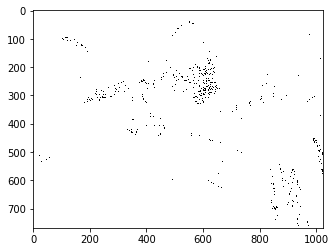

In [28]:
plt.imshow(new_pic)

## Задание 3

Теперь давайте уменьшим качество картинки в 16 раз, путем уменьшения качества изображения, т.е. теперь 16 пикселей по близости надо заполнить одним значением.

In [29]:
from sklearn.datasets import load_sample_image #импорт загрузчика изображения

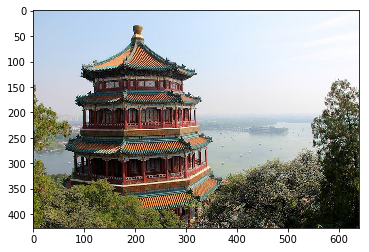

In [30]:
china = load_sample_image('china.jpg')
plt.imshow(china)

Запишите в переменные `h`, `w`, `c` высоту, ширину, количество каналов соответственно для картинки `china`.

In [31]:
h, w, c = china.shape

Теперь давайте непосредственно перейдем к изменению картинки $--$ мы предлагаем разбивать картинки на квадраты 4 на 4 и заполнять все 16 значений внутри квадрата левым верхним значением. Вы можете сделать иначе.

In [32]:
from copy import copy
compressed_pic = copy(china)
for i in range(0, len(compressed_pic), 4):
    for j in range(0, len(compressed_pic), 4):
        compressed_pic[i:i+4, j:j+4, :] = compressed_pic[i,j,:]
compressed_pic.shape, china.shape

((427, 640, 3), (427, 640, 3))

Напишите функцию, которая считает несоотвествие между исходной и сжатой картинкой. Запустите ваш код для `compressed_pic`, `china`

In [33]:
def calculate_mismatch(a,b):
    mismatch = np.sum(np.abs(a - b))
    print(mismatch)

In [34]:
calculate_mismatch(china, compressed_pic)

54892222


Посчитайте синус от каждого значения пикселей изображения `china` по всем каналам. Выведите картинку. Используйте функцию `np.sin` 

In [35]:
sin_china = np.sin(china).astype(np.uint8)
sin_china.shape, type(sin_china), china.dtype

((427, 640, 3), numpy.ndarray, dtype('uint8'))

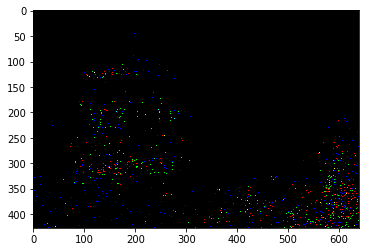

In [36]:
plt.imshow(sin_china)

Посмотрите на полученный результат. Как вы думаете, что можно делать с помощью такого преобразования? Какого рода объекты можно распознать?

### Задание 4*
это задание является дополнительным

Теперь давайте поработаем с аудиофайлами. Стандартный аудиофайл представляет собой обычный набор чисел, в котором хранятся значения частот, снятых с определенной периодичностью. Итак, самая простая аудиодорожка $-$ одномерный массив.

Первое, что нужно сделать $--$ установить библиотеку для работы с аудио. Она называется `librosa`. Гайд по установке: https://librosa.github.io/librosa/install.html


In [37]:
import librosa #импортируем библиотеку
import IPython.display

In [39]:
audio, sr= librosa.load('Test.wav')
# записываем наш массив звуковых частот в файл аудио, sr -- число точек, записываемых в секунду. 
# чтобы файл открылся, он должен лежать в той же папке, что и файл HW_2.ipynb

Нашу дорожку можно воспроизвести в самом файле `.ipynb`:

In [47]:
IPython.display.Audio(audio, rate=sr)

Выведите тип данных переменной `audio`, найдите ее длительность и среднее.

In [44]:
print(audio, audio.size / sr, np.average(audio))

[-5.5932451e-06 -1.2631664e-05 -1.9678897e-05 ... -8.2172455e-06
 -7.6307806e-06  0.0000000e+00] 5.656009070294784 -1.5741682e-05


    Давайте посмотрим, как выглядит наша дорожка. Для этого используем библиотеку `matplotlib.pyplot`

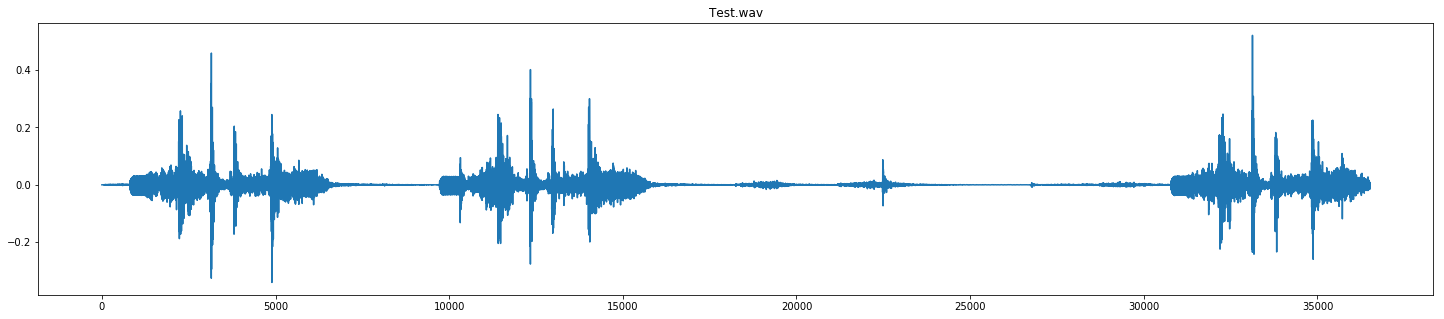

In [46]:
plt.figure(figsize=(25,5))
plt.title('Test.wav')
plt.plot(audio)

Обрежьте последние 4 секунды файла

In [45]:
audio = audio[:-4*sr]

Давайте уменьшим амплитуду на 25%. Что при этом изменится? Напоминаю, что вы всегда можете послушать изменения при помощи `IPython.display.Audio`

In [55]:
audio = audio * 0.1

А еще аудиодорожку можно ускорить. Для этого попробуйте потюнить параметр `rate`

In [57]:
IPython.display.Audio(audio, rate=4*sr)